## MachineLearningEngine Class

The MachineLearningEngine class is builds on the CoreEngine class. The CoreEngine class serves as a parent class engines that focus on data, while the MachineLearningEngine class is for engines that focus on learning from data.

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine

#Creates an empty MachineLearningEngine object and prints it
engine = MachineLearningEngine()
engine.print()

## MachineLearningAnalysis Class

The MachineLearningAnalysis class is builds on the class Analysis. The Analysis class that is used to perform analysis on the data. 

In [ ]:
from src.StreamPort.ml.MachineLearningAnalysis import MachineLearningAnalysis

#Creates an empty MachineLearningAnalysis obejct and prints it
analysis = MachineLearningAnalysis()
analysis.print()

#### Load the CSV File  

This method loads the dataset from csv file and create a list of analysis object. Used the data to make a matrix with the analysis names and visualizes the results using a scatter plot.  

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

#Creates an empty MachineLearningEngine object and prints it
path = 'feature_list.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)

engine.print()

print("Create a list of analysis object and prints it" )
for analysis in engine._analyses:
    print(f"Analysis: {analysis.name}")
    for key, value in analysis.data.items():
        print(f"{key}: {value}")
    print("\n")

rownames = engine.get_analyses_names()
print("Analysename: ", rownames)

mat = engine.get_data()
mat.index = rownames
print("Matrix: \n", mat)


#### Make a Principle Conponent Analysis (PCA)

The method implements a machine learning engine that perfporms PCA on the dataset and visualizes the results. ProcessingSetting is the parent of MakePCA. The ProcessingSettings used to assemble data processing workflows within the each engine. The subclass MakePCASKL of MakePCA using skitklearn algorithm to perform the PCA.

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import  MakeModelPCASKL
import webbrowser

#Creates an empty MachineLearningEngine object and prints it
path = 'feature_list.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)

class_path = 'new_metadata.csv'
engine.add_classes_from_csv(class_path)

#engine.print()
#print(engine.get_classes())

# !!! make a general data plot
engine.plot_data()
webbrowser.open('general_data_plot.html')
# x axis in the index of the features (i.e., col names)
# y axis is the valule for each analysis
# color legend is applied for each analysis

# Add the ProcessingSettings to the _settings attribute with add settings
pca_model = MakeModelPCASKL(n_components = 2, center_data= True)
engine.add_settings(pca_model)
#engine.print()
# Create a method in the ML engine to perfom PCA and collect the results
engine.run_workflow()
# The results are added to the _results atribute of the engine
# make a plot method in the ML engine for the PCA results and classes
engine.plot_pca()
# make a loadings plot after confirming the scores plot

In [ ]:
import pandas as pd
import webbrowser
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import MakeModelPCASKL

path = 'feature_list.csv'
class_path = 'new_metadata.csv'
df = pd.read_csv(class_path)

engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)

#plot both month
engine.add_month_classes(df, ['march', 'april']) 

pca_model = MakeModelPCASKL(n_components = 2, center_data= True)
engine.add_settings(pca_model)
engine.print()
engine.run_workflow()
engine.plot_pca()
webbrowser.open('pca_scores_plot.html')
webbrowser.open('pca_loadings_plot.html')

#plot only march
engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)
engine.add_month_classes(df, 'march') 

pca_model = MakeModelPCASKL(n_components = 2, center_data= True)
engine.add_settings(pca_model)
engine.print()
engine.run_workflow()
engine.plot_pca()

#plot only april
engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)
engine.add_month_classes(df, 'april') 

pca_model = MakeModelPCASKL(n_components = 2, center_data= True)
engine.add_settings(pca_model)
engine.print()
engine.run_workflow()
engine.plot_pca()

#### Make a Density-Based Spatial Clustering of Application with Noise (DBSCAN)



In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import plotly.express as px

eps = 1.5  
min_samples = 5  

path = 'feature_list.csv'  
engine = MachineLearningEngine()  
engine.add_analyses_from_csv(path)  
engine.print()  

df = pd.read_csv(path)
data = df.drop(columns=['name'])  

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(data)  

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  
n_noise = list(labels).count(-1) 
print(f"Anzahl der geschätzten Cluster: {n_clusters}")
print(f"Anzahl der Rauschpunkte: {n_noise}")

data['Cluster'] = labels  
data['Cluster'] = data['Cluster'].astype(str)  

random_columns = np.random.choice(data.columns, 2, replace=False)
fig = px.scatter(data, x=random_columns[0], y=random_columns[1], color='Cluster',
                 title="DBSCAN Clustering Results",
                 color_continuous_scale=px.colors.diverging.Tealrose,
                 labels={'color': 'Cluster ID'})

fig.show()  

### Uniform Manifold Approximation and Projection (UMAP)

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import  MakeModelUMAP

#Creates an empty MachineLearningEngine object and prints it
path = 'feature_list.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)

class_path = 'feature_metadata.csv'
engine.add_classes_from_csv(class_path)
#engine.print()

#plot all classes
umap_model = MakeModelUMAP(n_neighbors=15, min_dist=0.1, n_components=2,random_state=42)
engine.add_settings(umap_model)
#engine.print()
engine.run_workflow()
engine.plot_umap()

#plot both months
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)
engine.add_month_classes(df, ['march', 'april']) 
umap_model = MakeModelUMAP(n_neighbors=15, min_dist=0.1, n_components=2,random_state=42)
engine.add_settings(umap_model)
#engine.print()
engine.run_workflow()
engine.plot_umap()


In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import  MakeModelUMAP
import pandas as pd

path = 'feature_list.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)

class_path = 'new_metadata.csv'
df = pd.read_csv(class_path)

#plot march
engine.add_month_classes(df, 'march') 

umap_model = MakeModelUMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
engine.add_settings(umap_model)
engine.run_workflow()
engine.plot_umap()  

engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)

#plot april
engine.add_month_classes(df, 'april')  

umap_model = MakeModelUMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
engine.add_settings(umap_model)
engine.run_workflow()
engine.plot_umap()  

### Random Forest Classifier

update . . . 1.short data 2.long data (only used the classes csv, idk if is it right!) 

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# read
df = pd.read_csv('new_metadata.csv')
target_column = 'class'
print(df.shape)
print(df.info())
print(df.head())

# used label encoder for encode the columns
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  

# split data
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the parameter for gridsearchcv
param_grid = {
    'n_estimators': [50, 500],
    'max_depth': [3, 20]
}

# initalize random forest classifier and gridsearchcv
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# execute grid
print("Starte GridSearch...")
grid_search.fit(X_train, y_train)

# see the best hyperparameters and the model for it
print("Best hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation-Accuracy:", grid_search.best_score_)

# final model with the best hyperparameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# evaltuation of accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
class_report = classification_report(y_test, y_pred)
print("ClassificationReport:\n", class_report)

# confusionmatrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=label_encoders[target_column].classes_, 
                              columns=label_encoders[target_column].classes_)

# visualize the confusionsmatrix
fig_conf_matrix = px.imshow(conf_matrix_df, 
                            labels=dict(x="Predicted", y="Actual", color="Count"), 
                            x=label_encoders[target_column].classes_, 
                            y=label_encoders[target_column].classes_,
                            title="Confusion Matrix")

fig_conf_matrix.update_layout(coloraxis_showscale=True)
fig_conf_matrix.show()

# visualize feature importance
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
fig = px.bar(importance_df, x='Feature', y='Importance', title='Random Forest Feature Importances')
fig.show()

# export the first three decision trees from the forest
for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)



In [83]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# read
df = pd.read_csv('groups_classes.csv')
target_column = 'class'
print(df.shape)
print(df.info())
print(df.head())

# used label encoder for encode the columns
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  

# split data
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the parameter for gridsearchcv
param_grid = {
    'n_estimators': [50, 500],
    'max_depth': [3, 20]
}

# initalize random forest classifier and gridsearchcv
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# execute grid
print("Starte GridSearch...")
grid_search.fit(X_train, y_train)

# see the best hyperparameters and the model for it
print("Best hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation-Accuracy:", grid_search.best_score_)

# final model with the best hyperparameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# evaltuation of accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
class_report = classification_report(y_test, y_pred)
print("ClassificationReport:\n", class_report)

# confusionmatrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=label_encoders[target_column].classes_, 
                              columns=label_encoders[target_column].classes_)

# visualize the confusionsmatrix
fig_conf_matrix = px.imshow(conf_matrix_df, 
                            labels=dict(x="Predicted", y="Actual", color="Count"), 
                            x=label_encoders[target_column].classes_, 
                            y=label_encoders[target_column].classes_,
                            title="Confusion Matrix")

fig_conf_matrix.update_layout(coloraxis_showscale=True)
fig_conf_matrix.show()

# visualize feature importance
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
fig = px.bar(importance_df, x='Feature', y='Importance', title='Random Forest Feature Importances')
fig.show()

# export the first three decision trees from the forest
for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)



(497, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        497 non-null    object
 1   class       497 non-null    object
 2   polarity    497 non-null    object
 3   tag         497 non-null    object
 4   date        497 non-null    int64 
 5   month       497 non-null    object
 6   monthclass  497 non-null    object
 7   year        497 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.2+ KB
None
               name      class  polarity    tag      date     month  \
0  neg_20230222_027   neg_KAMG  negative   KAMG  20230222  february   
1  neg_20230316_032   neg_KARH  negative   KARH  20230316     march   
2  neg_20230316_033  neg_KAXAL  negative  KAXAL  20230316     march   
3  neg_20230316_034   neg_KARB  negative   KARB  20230316     march   
4  neg_20230316_035   neg_KAMG  negative   KAMG  20230316     march   

    

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Hierarchical Density-Based Spatial Clustering of Application (HDBSCAN)

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
import pandas as pd
import numpy as np
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

path = 'feature_list.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)
engine.print()

df = pd.read_csv(path)
data = df.drop(columns=['name'])

label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':  
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le


random_columns = np.random.choice(data.columns, 2, replace=False)

clusterer = HDBSCAN(min_cluster_size=3)
cluster_labels = clusterer.fit_predict(data)
data['cluster'] = cluster_labels  

fig = px.scatter(
    data,
    x=random_columns[0],
    y=random_columns[1],
    color='cluster',
    title='HDBSCAN Clustering mit Plotly'
)
fig.show()


### K-Means Cluster

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px

path = 'feature_list.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)

df = pd.read_csv(path)
data = df.drop(columns=['name']) 

# Define number of clusters for KMeans
n_clusters = 4  # Specify the number of clusters you expect

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(data)

data['Cluster'] = labels.astype(str) 

random_columns = np.random.choice(data.columns[:-1], 2, replace=False)

fig = px.scatter(
    data, 
    x=random_columns[0], 
    y=random_columns[1], 
    color='Cluster',
    title="KMeans Clustering Results",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    labels={'color': 'Cluster ID'}
)

fig.show()


## NEW DATA ##

### umap plot for the 'negative' and 'positive' classes. 

In [ ]:
import pandas as pd
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import MakeModelUMAP

path = 'groups_ints.csv'
class_path = 'groups_classes.csv'
df = pd.read_csv(class_path)

engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)

#plot negative polarity classes
engine.add_polarity_classes(df, 'negative') 

umap_model_neg = MakeModelUMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
engine.add_settings(umap_model_neg)
engine.run_workflow()
engine.plot_umap()

#plot positive polarity classes
engine = MachineLearningEngine()  
engine.add_analyses_from_csv(path)

engine.add_polarity_classes(df, 'positive')

umap_model_pos = MakeModelUMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
engine.add_settings(umap_model_pos)
engine.run_workflow()
engine.plot_umap()
 


In [ ]:
import pandas as pd
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import MakeModelUMAP

path = 'groups_ints.csv'
class_path = 'groups_classes.csv'
df = pd.read_csv(class_path)

engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)

#plot both polarity
engine.add_polarity_classes(df, ['negative', 'positive']) 

umap_model = MakeModelUMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
engine.add_settings(umap_model)
engine.run_workflow()
engine.plot_umap()  

### pca plot for the new data

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import  MakeModelPCASKL
import webbrowser

#Creates an empty MachineLearningEngine object and prints it
path = 'groups_ints.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)

class_path = 'groups_classes.csv'
engine.add_classes_from_csv(class_path)
engine.print()
engine.plot_data()
# webbrowser.open('general_data_plot.html')

pca_model = MakeModelPCASKL(n_components = 2, center_data= True)
engine.add_settings(pca_model)
#engine.print()
engine.run_workflow()
engine.plot_pca()
# webbrowser.open('pca_scores_plot.html')
# webbrowser.open('pca_loadings_plot.html')

plot pca for the 'negative' and 'positive' classes.

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import  MakeModelPCASKL
import pandas as pd

#Creates an empty MachineLearningEngine object and prints it
path = 'groups_ints.csv'
class_path = 'groups_classes.csv'
df = pd.read_csv(class_path)

engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)

# Plot negative polarity classes in PCA
engine.add_polarity_classes(df, 'negative')

pca_model_neg = MakeModelPCASKL(n_components = 2, center_data= True)
engine.add_settings(pca_model_neg)
engine.run_workflow()
engine.plot_pca()

engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)

#plot positive polarity classes in PCA
engine.add_polarity_classes(df, 'positive')

pca_model_pos = MakeModelPCASKL(n_components = 2, center_data= True)
engine.add_settings(pca_model_pos)
engine.run_workflow()
engine.plot_pca()  


### dbscan plot for the new data

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine

import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import plotly.express as px

path = 'groups_ints.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)

class_path = 'groups_classes.csv'
engine.add_classes_from_csv(class_path)

# Set DBSCAN parameters
eps = 1.5  # Radius around a point to consider others as neighbors
min_samples = 5  # Minimum neighbors a point must have to not be considered noise

df = pd.read_csv(path)
data = df.drop(columns=['name']) 

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(data) 

# Calculate and print estimated number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Number of clusters
n_noise = list(labels).count(-1)  # Number of noise points
print(f"Estimated number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Add cluster labels to the data
data['Cluster'] = labels
data['Cluster'] = data['Cluster'].astype(str)  # Convert cluster labels to strings for categorical display

random_columns = np.random.choice(data.columns, 2, replace=False)

fig = px.scatter(
    data, 
    x=random_columns[0], 
    y=random_columns[1], 
    color='Cluster',
    title="DBSCAN Clustering Results",
    color_continuous_scale=px.colors.diverging.Tealrose,
    labels={'color': 'Cluster ID'}
)
fig.show()  


### random forest plot

show you at the meeting. . .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Columns: 4552 entries, name to year
dtypes: float64(4535), int64(11), object(6)
memory usage: 17.3+ MB
None
(497, 4552)
               name  M100_R1190_4  M100_R1283_6  M100_R259_7  M100_R651_8  \
0  neg_20230222_027             0             0            0            0   
1  neg_20230316_032             0             0            0            0   
2  neg_20230316_033             0             0            0            0   
3  neg_20230316_034             0             0            0            0   
4  neg_20230316_035             0             0            0            0   

   M100_R733_9  M101_R161_21  M101_R490_19  M101_R699_22  M101_R800_18  ...  \
0            0             0             0             0             0  ...   
1            0             0             0             0             0  ...   
2            0             0             0             0             0  ...   
3            0             0 

c:\Users\aylen\IUTA\StreamPort\.venv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning:

The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.



Best hyperparameters: {'n_estimators': 500, 'max_depth': 20}
Accuracy:  0.96


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

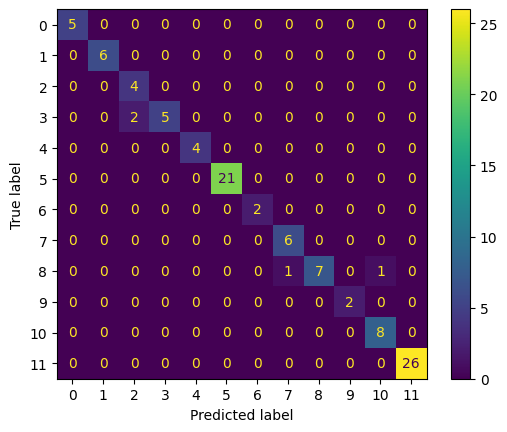

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import Image
from scipy.stats import randint

# read data
features_df = pd.read_csv('groups_ints.csv')  
labels_df = pd.read_csv('groups_classes.csv') 
merged_df = pd.merge(features_df, labels_df, on='name')
print(merged_df.info())
print(merged_df.shape)
print(merged_df.head())

# prepare data
X = merged_df.drop(['name','class'], axis=1)
y = merged_df['class']

# use oridalencoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_encoded = ordinal_encoder.fit_transform(X)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


param_dist = {
    'n_estimators': [50, 500],
    'max_depth': [3, 20]
    }

# initialisiere and fit RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train) # train the model
y_pred_oe = rf.predict(X_test)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(estimator=rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
# Fit the random search object to the data
print("Starting RandomizedSearch...")
rand_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Create a variable for the best model
best_rf = rand_search.best_estimator_
y_pred = best_rf.predict(X_test)

# add accuracy
accuracy_oe = accuracy_score(y_test, y_pred_oe)
print("Accuracy: ", accuracy_oe)
#print("Classification report:\n", classification_report(y_test, y_pred_oe))

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred_oe)
cm_df = pd.DataFrame(cm, index=best_rf.classes_, columns=best_rf.classes_)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# plot the confusion matrix using plotly
fig = go.Figure(data=go.Heatmap(
                    z=cm_df.values,
                    x=cm_df.columns,
                    y=cm_df.index,
                    colorscale='Blues',
                    zmin=0, zmax=np.max(cm_df.values),
                    colorbar=dict(title='Count'),
                    hovertemplate='True Label: %{y}<br>Predicted: %{x}<br>Count: %{z}'
                ))

fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    autosize=True,
    xaxis=dict(tickmode='array', tickvals=np.arange(len(cm_df.columns)), ticktext=cm_df.columns),
    yaxis=dict(tickmode='array', tickvals=np.arange(len(cm_df.index)), ticktext=cm_df.index)
)

fig.show()


# Export the first three decision trees from the forest
for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = Source(dot_data)
    display(graph)


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import export_graphviz
from graphviz import Source
from scipy.stats import randint

# read data
features_df = pd.read_csv('groups_ints.csv')  
labels_df = pd.read_csv('groups_classes.csv') 
merged_df = pd.merge(features_df, labels_df, on='name')
print(merged_df.info())
print(merged_df.shape)
print(merged_df.head())

# prepare data
X = merged_df.drop(['name', 'class'], axis=1)
y = merged_df['class']

# column to encode
cols_to_encode = ['polarity', 'month', 'year','tag','monthclass']
non_numerical_cols = X.select_dtypes(include=['object']).columns

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use ordinalencoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

X_train[cols_to_encode] = ordinal_encoder.fit_transform(X_train[cols_to_encode])
X_test[cols_to_encode] = ordinal_encoder.transform(X_test[cols_to_encode])

# # initialisiere and fit RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_oe = rf_classifier.predict(X_test)

# use randomizedsearchcv
param_dist = {'n_estimators': randint(50, 500), 'max_depth': randint(1, 20)}
rand_search = RandomizedSearchCV(
    rf_classifier, 
    param_distributions=param_dist, 
    n_iter=5, 
    cv=5,
    random_state=42
)
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_

# see best hyperparameter and accuracy
print('Best hyperparameters:', rand_search.best_params_)
accuracy_oe = accuracy_score(y_test, y_pred_oe)
print("Accuracy: ", accuracy_oe)
print("Classification report:\n", classification_report(y_test, y_pred_oe))

# confusionsmatrix
cm = confusion_matrix(y_test, y_pred_oe)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

cm_df = pd.DataFrame(cm, index=best_rf.classes_, columns=best_rf.classes_)
fig = go.Figure(data=go.Heatmap(
    z=cm_df.values,
    x=cm_df.columns,
    y=cm_df.index,
    colorscale='Blues',
    zmin=0, zmax=np.max(cm_df.values),
    colorbar=dict(title='Count'),
    hovertemplate='True Label: %{y}<br>Predicted: %{x}<br>Count: %{z}'
))
fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    autosize=True
)
fig.show()

# Export the first three decision trees from the forest
for i in range(3):
    tree = rf_classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = Source(dot_data)
    display(graph)


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import export_graphviz
from graphviz import Source
from scipy.stats import randint

# read data
features_df = pd.read_csv('feature_list.csv')  
labels_df = pd.read_csv('new_metadata.csv') 
merged_df = pd.merge(features_df, labels_df, on='name')

# prepare data
X = merged_df.drop(['name', 'class'], axis=1)
y = merged_df['class']

# encode the columns
cols_to_encode = ['month', 'monthclass']
non_numerical_cols = X.select_dtypes(include=['object']).columns

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use ordinalencoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

X_train[cols_to_encode] = ordinal_encoder.fit_transform(X_train[cols_to_encode])
X_test[cols_to_encode] = ordinal_encoder.transform(X_test[cols_to_encode])

# # initialisiere and fit RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_oe = rf_classifier.predict(X_test)

# use randomizedsearchcv
param_dist = {'n_estimators': randint(50, 500), 'max_depth': randint(1, 20)}
rand_search = RandomizedSearchCV(
    rf_classifier, 
    param_distributions=param_dist, 
    n_iter=5, 
    cv=5,
    random_state=42
)
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_

# see best hyperparameter and accuracy
print('Best hyperparameters:', rand_search.best_params_)
accuracy_oe = accuracy_score(y_test, y_pred_oe)
print("Accuracy: ", accuracy_oe)
print("Classification report:\n", classification_report(y_test, y_pred_oe))

# confusionsmatrix
cm = confusion_matrix(y_test, y_pred_oe)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

cm_df = pd.DataFrame(cm, index=best_rf.classes_, columns=best_rf.classes_)
fig = go.Figure(data=go.Heatmap(
    z=cm_df.values,
    x=cm_df.columns,
    y=cm_df.index,
    colorscale='Blues',
    zmin=0, zmax=np.max(cm_df.values),
    colorbar=dict(title='Count'),
    hovertemplate='True Label: %{y}<br>Predicted: %{x}<br>Count: %{z}'
))
fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    autosize=True
)
fig.show()

# Export the first three decision trees from the forest
for i in range(3):
    tree = rf_classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = Source(dot_data)
    display(graph)


### hdbscan plot for the new data


In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
import pandas as pd
import numpy as np
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

path = 'groups_ints.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)
engine.print()

df = pd.read_csv(path)
data = df.drop(columns=['name'])

label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object': 
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

random_columns = np.random.choice(data.columns, 2, replace=False)

clusterer = HDBSCAN(min_cluster_size=3)
cluster_labels = clusterer.fit_predict(data)
data['cluster'] = cluster_labels  

fig = px.scatter(
    data,
    x=random_columns[0],
    y=random_columns[1],
    color='cluster',
    title='HDBSCAN Clustering mit Plotly'
)
fig.show()


### k-means plot

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('groups_ints.csv')
data = df.drop(columns=['name'])

label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object': 
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le  

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

kmeans = KMeans(n_clusters=5, random_state=42) 
cluster_labels = kmeans.fit_predict(data)

pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels.astype(str)  

fig = px.scatter(pca_df, x='PCA1', y='PCA2', color='Cluster', title='KMeans Clustering Results',
                 labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2'})

fig.show()

In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px

path = 'groups_ints.csv'
engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)

df = pd.read_csv(path)
data = df.drop(columns=['name'])  

# Define number of clusters for KMeans
n_clusters = 10  # Specify the number of clusters you expect

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(data)

data['Cluster'] = labels.astype(str)  # Convert to string for color coding in plot

random_columns = np.random.choice(data.columns[:-1], 2, replace=False)

fig = px.scatter(
    data, 
    x=random_columns[0], 
    y=random_columns[1], 
    color='Cluster',
    title="KMeans Clustering Results",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    labels={'color': 'Cluster ID'}
)

fig.show()

### filter 'month' with umap 

In [ ]:
import pandas as pd
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import MakeModelUMAP

path = 'groups_ints.csv'
class_path = 'groups_classes.csv'
df = pd.read_csv(class_path)

engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)

engine.add_month_classes(df, 'may')  

umap_model = MakeModelUMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
engine.add_settings(umap_model)
engine.run_workflow()
engine.plot_umap()  


In [ ]:
print("plot pos classes")
engine = MachineLearningEngine()  
engine.add_analyses_from_csv(path)

engine.add_month_classes(df, 'april')  

umap_model = MakeModelUMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
engine.add_settings(umap_model)
engine.run_workflow()
engine.plot_umap()  

In [ ]:
import pandas as pd
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import MakeModelUMAP

path = 'groups_ints.csv'
class_path = 'groups_classes.csv'
df = pd.read_csv(class_path)

engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)

engine.add_month_classes(df, 'april')  

umap_model = MakeModelUMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
engine.add_settings(umap_model)
engine.run_workflow()
engine.plot_umap() 

In [ ]:
import pandas as pd
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine, MachineLearningAnalysis
from src.StreamPort.ml.MachineLearningProcessingSettings import MakeModelUMAP

path = 'groups_ints.csv'
class_path = 'groups_classes.csv'
df = pd.read_csv(class_path)

engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)

for index, row in df.iterrows():
        row_value = row.tolist()[1:] 
        class_name = row['month']
        ana = MachineLearningAnalysis(name=str(class_name), 
                                          data={"x": np.array(df.columns.tolist()[1:]), 
                                                "y": np.array(row_value)})
        if ana.validate():
            engine.add_classes(class_name)
        else:
            print(f"Analysis {class_name} did not pass validation.") 

umap_model = MakeModelUMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
engine.add_settings(umap_model)
engine.run_workflow()
engine.plot_umap() 

### filter 'month' plot with pca

In [ ]:
import pandas as pd
import webbrowser
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import MakeModelPCASKL

path = 'groups_ints.csv'
class_path = 'groups_classes.csv'
df = pd.read_csv(class_path)

engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)

engine.add_month_classes(df, 'may') 

pca_model = MakeModelPCASKL(n_components = 2, center_data= True)
engine.add_settings(pca_model)
engine.print()
engine.run_workflow()
engine.plot_pca()
webbrowser.open('pca_scores_plot.html')
webbrowser.open('pca_loadings_plot.html')

In [ ]:
import pandas as pd
import webbrowser
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import MakeModelPCASKL

path = 'groups_ints.csv'
class_path = 'groups_classes.csv'
df = pd.read_csv(class_path)

engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)

engine.add_month_classes(df, 'december') 

pca_model = MakeModelPCASKL(n_components = 10, center_data= True)
engine.add_settings(pca_model)
engine.print()
engine.run_workflow()
engine.plot_pca()
webbrowser.open('pca_scores_plot.html')
webbrowser.open('pca_loadings_plot.html')

In [ ]:
import pandas as pd
import webbrowser
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import MakeModelPCASKL

path = 'groups_ints.csv'
class_path = 'groups_classes.csv'
df = pd.read_csv(class_path)

engine = MachineLearningEngine() 
engine.add_analyses_from_csv(path)

engine.add_month_classes(df, ['may', 'april']) 

pca_model = MakeModelPCASKL(n_components = 2, center_data= True)
engine.add_settings(pca_model)
engine.print()
engine.run_workflow()
engine.plot_pca()
webbrowser.open('pca_scores_plot.html')
webbrowser.open('pca_loadings_plot.html')

### pca umap test for feautre list

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

path = 'feature_list.csv'
df_data = pd.read_csv(path)
class_path = 'new_metadata.csv'
df_classes = pd.read_csv(class_path)

print(df_data.shape)
print(df_classes.shape)

df_merged = pd.merge(df_data, df_classes)
print(df_merged.shape)
print(df_merged.head())

# standardize dataset
df_data_numeric = df_merged.select_dtypes(include=[np.number])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_data_numeric)

# the month with the most entries
month_counts = df_merged['month'].value_counts()
print("Anzahl der Einträge pro Monat:\n", month_counts)

# unique months/classes
unique_months = df_merged['month'].unique()
unique_classes = df_merged['class'].unique()

# find number of components
nums = np.arange(1,20)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(data_scaled)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

df_var = pd.DataFrame({"num" : nums, "var_ratio" : var_ratio})
fig = px.line(df_var, x='num', y='var_ratio', markers=True,
              title="Explained Variance",
              labels={'num': 'Number of Components', 'var_ratio': 'Explained Variance Ratio'})
fig.show()

# pca
n_components=10
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)
print(principal_components.shape)

pca_df = pd.DataFrame(data=principal_components[:, [0,1]],columns=['PC1', 'PC2'])
pca_df['class'] = df_merged['class'].values  
pca_df['month'] = df_merged['month'].values 

# get min/max for axis scaling
offset = 5
minC1 = pca_df.min()[0] - offset
maxC1 = pca_df.max()[0] + offset
minC2 = pca_df.min()[1] - offset
maxC2 = pca_df.max()[1] + offset
fig = px.scatter(
        pca_df, x='PC1', y='PC2', color='class',
        facet_row='month',
        title=f'PCA results by month',
        labels={'PC1': 'Hauptkomponente 1', 'PC2': 'Hauptkomponente 2', 'color': 'class'},
        range_x=[minC1, maxC1], range_y=[minC2, maxC2]
)
fig.show()

# loop through each class
fig = px.scatter(
        pca_df, x='PC1', y='PC2', color='month', symbol='month',
        facet_row='class',
        title=f'PCA results by class',
        labels={'PC1': 'Hauptkomponente 1', 'PC2': 'Hauptkomponente 2', 'color': 'month'},
        range_x=[minC1, maxC1], range_y=[minC2, maxC2]
    )

fig.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
import plotly.express as px

path = 'feature_list.csv'
df_data = pd.read_csv(path)
class_path = 'new_metadata.csv'
df_classes = pd.read_csv(class_path)

df_merged = pd.merge(df_data, df_classes)
df_data_numeric = df_merged.select_dtypes(include=[np.number])

# standardize dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_data_numeric)

# use umap 
n_components = 2
umap_model = umap.UMAP(n_components=n_components, random_state=42)
umap_components = umap_model.fit_transform(data_scaled)

umap_df = pd.DataFrame(data=umap_components, columns=['UMAP1', 'UMAP2'])
umap_df['class'] = df_merged['class'].values
umap_df['month'] = df_merged['month'].values

fig = px.scatter(umap_df, x='UMAP1', y='UMAP2', color='month', title='UMAP für alle Monate',
                 labels={'UMAP1': 'UMAP Komponente 1', 'UMAP2': 'UMAP Komponente 2'})
fig.show()

# find the month with the max entries
month_counts = df_merged['month'].value_counts()
max_entries_month = month_counts.idxmax()
max_entries_count = month_counts.max()

print(f"Der Monat mit den meisten Einträgen ist {max_entries_month} mit {max_entries_count} Einträgen.")
print("Anzahl der Einträge pro Monat:\n", month_counts)


# unique months
unique_months = df_merged['month'].unique()

# loop through each month
for month in unique_months:
    # filter data for the current month
    month_data = umap_df[umap_df['month'] == month]
    
    # plot pca for current month
    fig = px.scatter(
        month_data, x='UMAP1', y='UMAP2', color='class',
        title=f'UMAP 2D Scatter Plot für {month}',
        labels={'color': 'class'}
    )
    fig.update_layout(xaxis_title="UMAP1", yaxis_title="UMAP2")
    fig.show()


#### Test umap and pca for groups

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
from src.StreamPort.ml.MachineLearningProcessingSettings import MakeModelUMAP
import plotly.express as px

path = 'groups_ints.csv'
df_data = pd.read_csv(path)
class_path = 'groups_classes.csv'
df_classes = pd.read_csv(class_path)

engine = MachineLearningEngine()
engine.add_analyses_from_csv(path)
engine.add_classes_from_csv(class_path)
engine.print()

df_merged = pd.merge(df_data, df_classes)
df_data_numeric = df_merged.select_dtypes(include=[np.number])

# standardize dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_data_numeric)

# use umap 
n_components = 2
umap_model = umap.UMAP(n_components=n_components, random_state=42)
umap_components = umap_model.fit_transform(data_scaled)

umap_df = pd.DataFrame(data=umap_components, columns=['UMAP1', 'UMAP2'])
umap_df['class'] = df_merged['class'].values
umap_df['month'] = df_merged['month'].values

fig = px.scatter(umap_df, x='UMAP1', y='UMAP2', color='month', title='UMAP für alle Monate',
                 labels={'UMAP1': 'UMAP Komponente 1', 'UMAP2': 'UMAP Komponente 2'})
fig.show()

# find the month with the max entries
month_counts = df_merged['month'].value_counts()
max_entries_month = month_counts.idxmax()
max_entries_count = month_counts.max()

print(f"Der Monat mit den meisten Einträgen ist {max_entries_month} mit {max_entries_count} Einträgen.")
print("Anzahl der Einträge pro Monat:\n", month_counts)


# unique months
unique_months = df_merged['month'].unique()

# loop through each month
for month in unique_months:
    # filter data for the current month
    month_data = umap_df[umap_df['month'] == month]
    
    # plot pca for current month
    fig = px.scatter(
        month_data, x='UMAP1', y='UMAP2', color='class',
        title=f'UMAP 2D Scatter Plot für {month}',
        labels={'color': 'class'}
    )
    fig.update_layout(xaxis_title="UMAP1", yaxis_title="UMAP2")
    fig.show()


In [ ]:
from src.StreamPort.ml.MachineLearningEngine import MachineLearningEngine
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

path = 'groups_ints.csv'
df_data = pd.read_csv(path)
class_path = 'groups_classes.csv'
df_classes = pd.read_csv(class_path)

print(df_data.shape)
print(df_classes.shape)

df_merged = pd.merge(df_data, df_classes)
print(df_merged.shape)
print(df_merged.head())

# standardize dataset
df_data_numeric = df_merged.select_dtypes(include=[np.number])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_data_numeric)

# the month with the most entries
month_counts = df_merged['month'].value_counts()
print("Anzahl der Einträge pro Monat:\n", month_counts)

# unique months/classes
unique_months = df_merged['month'].unique()
unique_classes = df_merged['class'].unique()

# find number of components
nums = np.arange(1,20)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(data_scaled)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

df_var = pd.DataFrame({"num" : nums, "var_ratio" : var_ratio})
fig = px.line(df_var, x='num', y='var_ratio', markers=True,
              title="Explained Variance",
              labels={'num': 'Number of Components', 'var_ratio': 'Explained Variance Ratio'})
fig.show()

# pca
n_components=10
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)
print(principal_components.shape)

pca_df = pd.DataFrame(data=principal_components[:, [0,1]],columns=['PC1', 'PC2'])
pca_df['class'] = df_merged['class'].values  
pca_df['month'] = df_merged['month'].values 

# get min/max for axis scaling
offset = 5
minC1 = pca_df.min()[0] - offset
maxC1 = pca_df.max()[0] + offset
minC2 = pca_df.min()[1] - offset
maxC2 = pca_df.max()[1] + offset
fig = px.scatter(
        pca_df, x='PC1', y='PC2', color='class',
        facet_row='month',
        title=f'PCA results by month',
        labels={'PC1': 'Hauptkomponente 1', 'PC2': 'Hauptkomponente 2', 'color': 'class'},
        range_x=[minC1, maxC1], range_y=[minC2, maxC2]
)
fig.show()

# loop through each class
fig = px.scatter(
        pca_df, x='PC1', y='PC2', color='month', symbol='month',
        facet_row='class',
        title=f'PCA results by class',
        labels={'PC1': 'Hauptkomponente 1', 'PC2': 'Hauptkomponente 2', 'color': 'month'},
        range_x=[minC1, maxC1], range_y=[minC2, maxC2]
    )

fig.show()